In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from gensim.models import LdaModel

In [2]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"]
df["date_index"]

0        22-Apr-15 3:53:50 PM
1       04-Aug-15 10:22:56 AM
2        18-Apr-15 9:55:47 AM
3       05-Jul-15 11:59:35 AM
4        26-May-15 1:25:26 PM
                ...          
2219     04-Feb-15 9:13:18 AM
2220     06-Feb-15 1:24:39 PM
2221     06-Sep-15 5:28:41 PM
2222    23-Jun-15 11:13:30 PM
2223    24-Jun-15 10:28:33 PM
Name: date_index, Length: 2224, dtype: object

In [6]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-Jul-15 11:59:35 AM
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-May-15 1:25:26 PM


In [7]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
date_index                     object
dtype: object

In [8]:
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [9]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [10]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47


In [11]:
df.set_index(df["date_index"])

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-04 09:13:18,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04 09:13:18
2015-02-06 13:24:39,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06 13:24:39
2015-09-06 17:28:41,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06 17:28:41


In [12]:
df["Date_month_year"].value_counts()[:20]

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
2015-06-29     51
2015-06-18     47
2015-12-06     43
2015-06-27     39
2015-06-15     34
2015-06-17     32
2015-06-13     32
2015-06-22     30
2015-06-19     29
2015-05-06     29
2015-06-16     29
2015-08-04     28
2015-02-04     27
2015-06-28     27
2015-05-26     27
Name: Date_month_year, dtype: int64

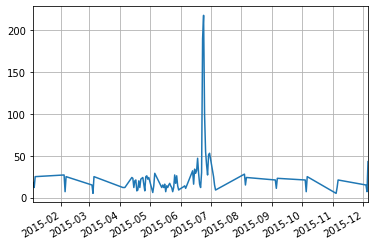

In [13]:
df["Date_month_year"].value_counts().plot(grid=True);

In [14]:
pd.value_counts(df['State']).to_frame(name='Frequency').rename_axis('State').sort_index()

,Frequency
State,
Alabama,26
Arizona,20
Arkansas,6
California,220
Colorado,80
Connecticut,12
Delaware,12
District Of Columbia,16
District of Columbia,1


In [15]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame(name = 'Frequency')

,Frequency
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


In [16]:
txt= df["Customer Complaint"]. values

In [17]:
stop=set(stopwords.words('english'))
exclude=set(string.punctuation)
lemma=WordNetLemmatizer()

In [18]:
def clean(doc):
    stop_free=" ".join([i for i in doc.lower().split() if i not in stop])
    punc_free="".join([ch for ch in stop_free if ch not in exclude])
    normalised=" ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [19]:
doc_complete=df["Customer Complaint"].tolist()
doc_clean=[clean(doc).split() for doc in doc_complete]

In [20]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [21]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [22]:
Num_Topic = 9
ldamodel = LdaModel(doc_term_matrix, num_topics= Num_Topic, id2word= dictionary, passes= 30)

In [23]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.119*"comcast" + 0.084*"service" + 0.083*"complaint" + 0.022*"bill" + 0.019*"monthly" + 0.018*"refund" + 0.017*"false" + 0.015*"year" + 0.014*"billed" + 0.013*"contract"')

(1, '0.163*"data" + 0.134*"comcast" + 0.132*"cap" + 0.058*"service" + 0.031*"usage" + 0.027*"pricing" + 0.022*"poor" + 0.016*"xfinity" + 0.015*"business" + 0.013*"limit"')

(2, '0.092*"comcast" + 0.049*"service" + 0.035*"without" + 0.021*"paying" + 0.021*"help" + 0.015*"month" + 0.012*"low" + 0.012*"rate" + 0.012*"please" + 0.011*"bill"')

(3, '0.212*"comcast" + 0.047*"xfinity" + 0.025*"switch" + 0.023*"home" + 0.019*"contract" + 0.017*"bait" + 0.017*"xfinitycomcast" + 0.017*"false" + 0.016*"appointment" + 0.016*"signal"')

(4, '0.111*"internet" + 0.084*"comcast" + 0.067*"service" + 0.053*"slow" + 0.049*"customer" + 0.038*"speed" + 0.022*"cable" + 0.020*"outage" + 0.019*"access" + 0.018*"connectivity"')

(5, '0.137*"charge" + 0.127*"comcast" + 0.044*"bill" + 0.040*"comcastxfinity" + 0.037*"fee" + 0.030*"overag

In [24]:
word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [25]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,comcast,data,comcast,comcast,internet,charge,billing,speed,internet
1,service,comcast,service,xfinity,comcast,comcast,comcast,service,comcast
2,complaint,cap,without,switch,service,bill,issue,bandwidth,service
3,bill,service,paying,home,slow,comcastxfinity,practice,get,speed
4,monthly,usage,help,contract,customer,fee,unfair,comcast,price
5,refund,pricing,month,bait,speed,overage,service,promised,throttling
6,false,poor,low,xfinitycomcast,cable,lack,fraudulent,throttled,problem
7,year,xfinity,rate,false,outage,account,connection,pay,cable
8,billed,business,please,appointment,access,charging,day,10,high
9,contract,limit,bill,signal,connectivity,cramming,deceptive,week,bill


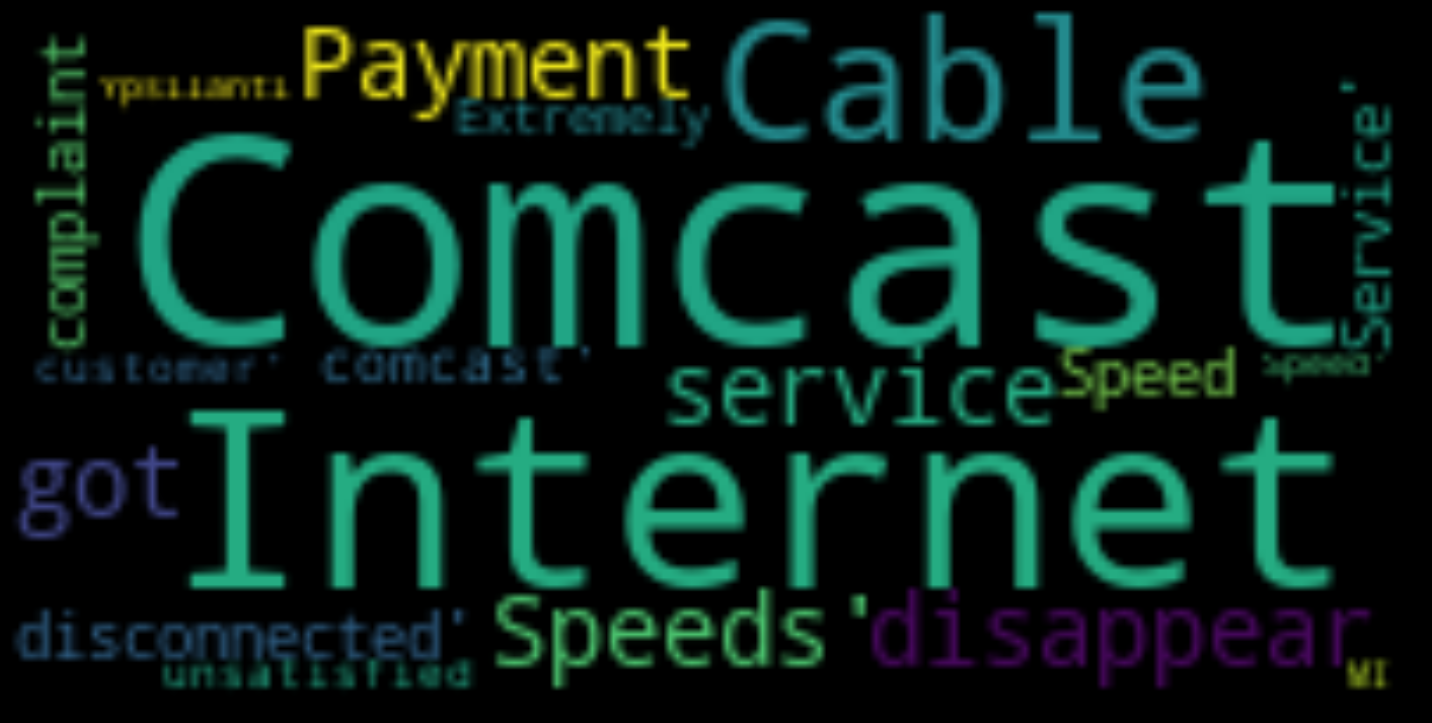

In [26]:
wc=WordCloud(width=200, height=100, background_color="black", stopwords=STOPWORDS).generate(str(txt))
fig=plt.figure(figsize=(20,20), facecolor='k', edgecolor='w')
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

In [27]:
pd.value_counts(df['Status']).to_frame(name='Frequency').rename_axis('Status').sort_index()

,Frequency
Status,
Closed,734
Open,363
Pending,154
Solved,973


In [28]:
["Open" if (Status=="Open" or Status=="Pending") else "Closed" for Status in df["Status"]]

['Closed',
 'Closed',
 'Closed',
 'Open',
 'Closed',
 'Closed',
 'Open',
 'Closed',
 'Closed',
 'Open',
 'Closed',
 'Closed',
 'Open',
 'Closed',
 'Closed',
 'Open',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Open',
 'Closed',
 'Open',
 'Open',
 'Closed',
 'Closed',
 'Open',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Open',
 'Open',
 'Open',
 'Open',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Open',
 'Closed',
 'Closed',
 'Closed',
 'Open',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Open',
 'Closed',
 'Open',
 'Closed',
 'Closed',
 'Closed',
 'Open',
 'Open',
 'Open',
 'Closed',
 'Closed',
 'Closed',
 'Clos

In [29]:
df["newStatus"]=["Open" if (Status=="Open" or Status=="Pending") else "Closed" for Status in df["Status"]]
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed


In [30]:
df.groupby(["State","newStatus"]).size()

State          newStatus
Alabama        Closed       17
               Open          9
Arizona        Closed       14
               Open          6
Arkansas       Closed        6
                            ..
Virginia       Open         11
Washington     Closed       75
               Open         23
West Virginia  Closed        8
               Open          3
Length: 77, dtype: int64

In [31]:
df.groupby(["State","newStatus"]).size().unstack()

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


In [32]:
df.groupby(["State","newStatus"]).size().unstack().fillna(0)

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


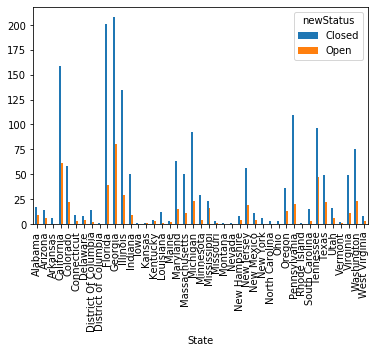

In [33]:
status_complaints=df.groupby(["State","newStatus"]).size().unstack().fillna(0)
status_complaints.plot(kind="bar")

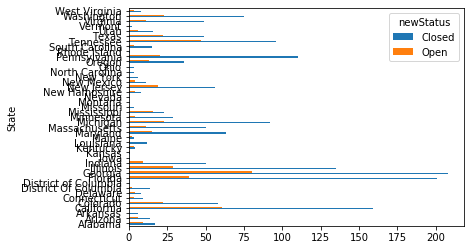

In [34]:
status_complaints.plot(kind="barh")

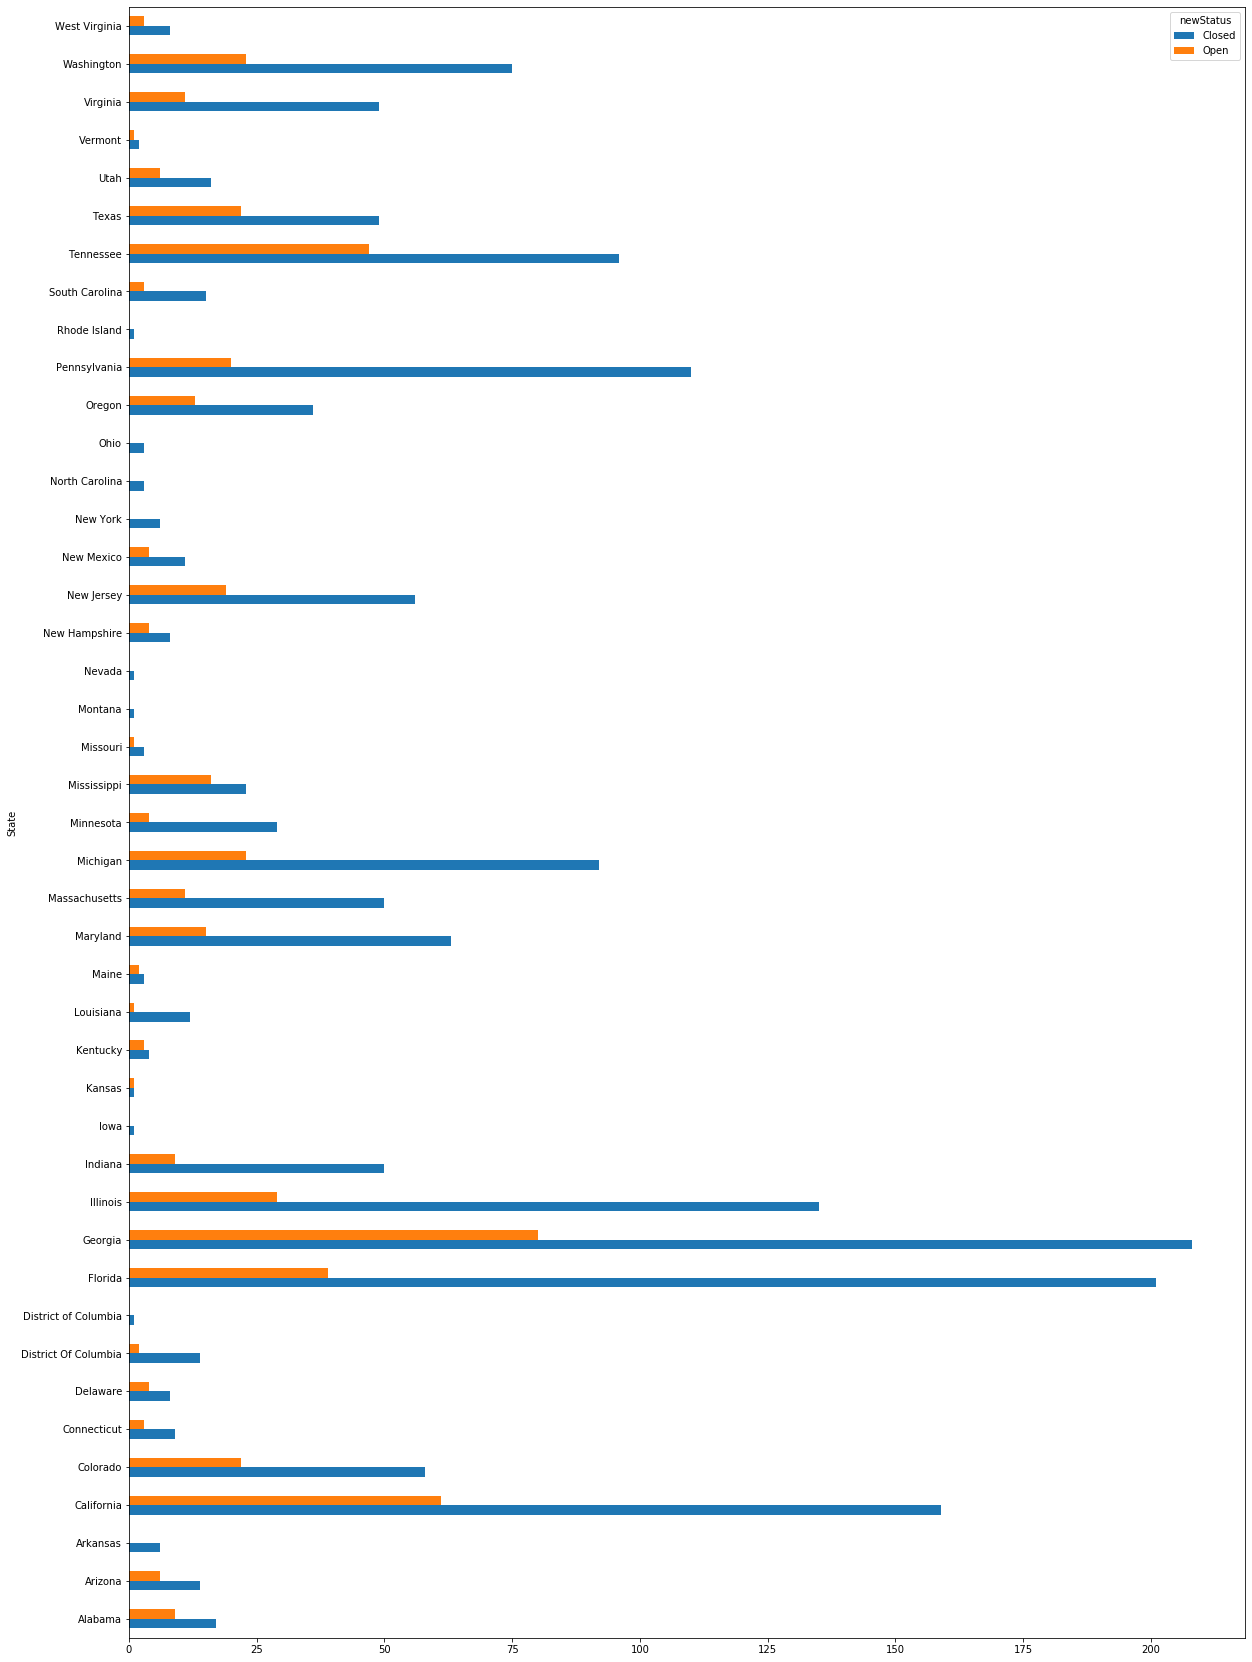

In [35]:
status_complaints.plot(kind="barh", figsize=(20,30))

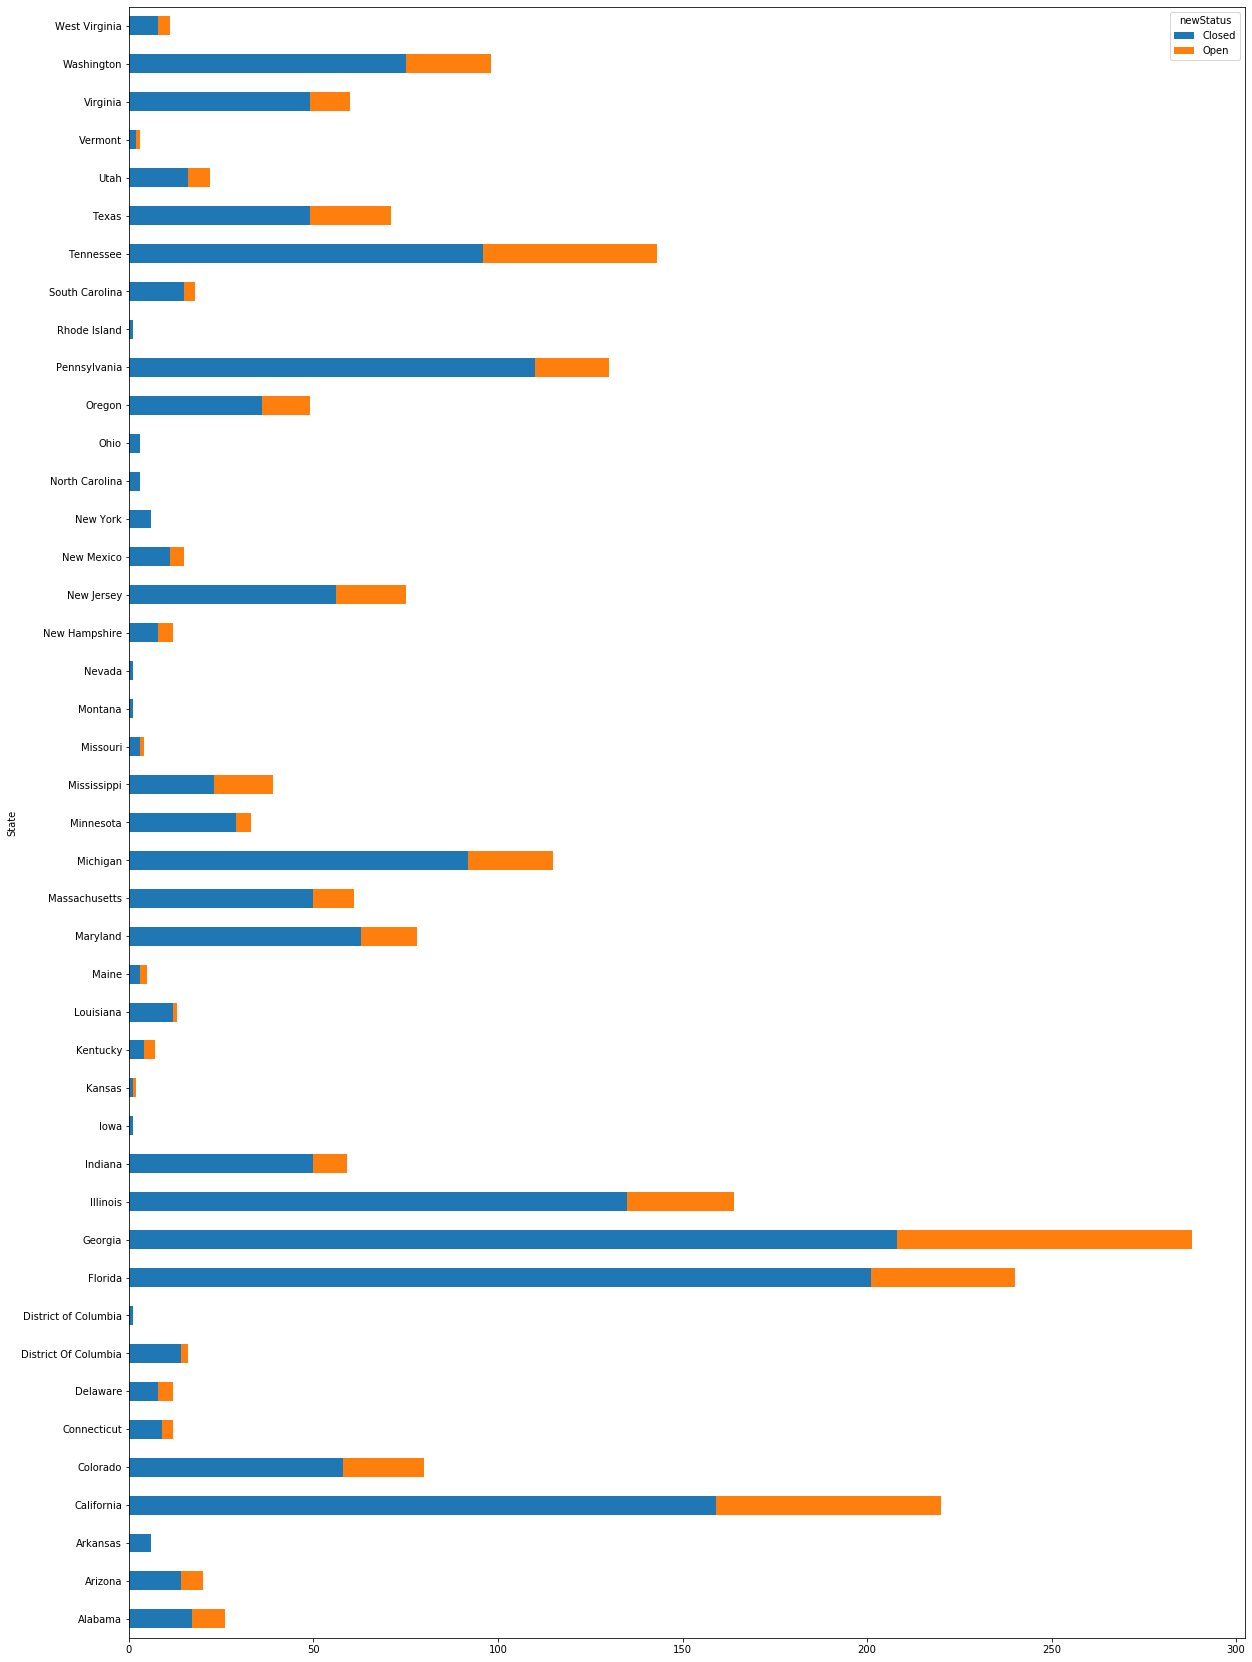

In [36]:
status_complaints.plot(kind="barh", figsize=(20,30), stacked=True)

In [37]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [38]:
df.groupby(["State","newStatus"]).size().unstack().fillna(0).max()

newStatus
Closed    208.0
Open       80.0
dtype: float64